In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

Let's try it with Keras, to use all these words we've been talking about in practice!

# 1. Load and inspect the data

Using a Keras model on the Abalone dataset

We are going to use Keras for a regression problem on tabular/structured data. This means data that is naturally structured into a table, where each row is an observation and each column is a variable which we can understand. We can compare this to a picture, if each row is a picture and each column is a pixel, the column aren't really understandable for us as humans. 

The Abalone data is structured like this. It contains over 4000 examples of abalones, which are marine snails. The columns represent different attributes of the abalone, such as size, weight, length and sex. This dataset isn't actually very useful for neural network because it is simply not so complex that it needs such an advancdes algorithm, but we are using it on this camp to have an easy and fast way to start understanding Keras before we jump into more complex data types :)

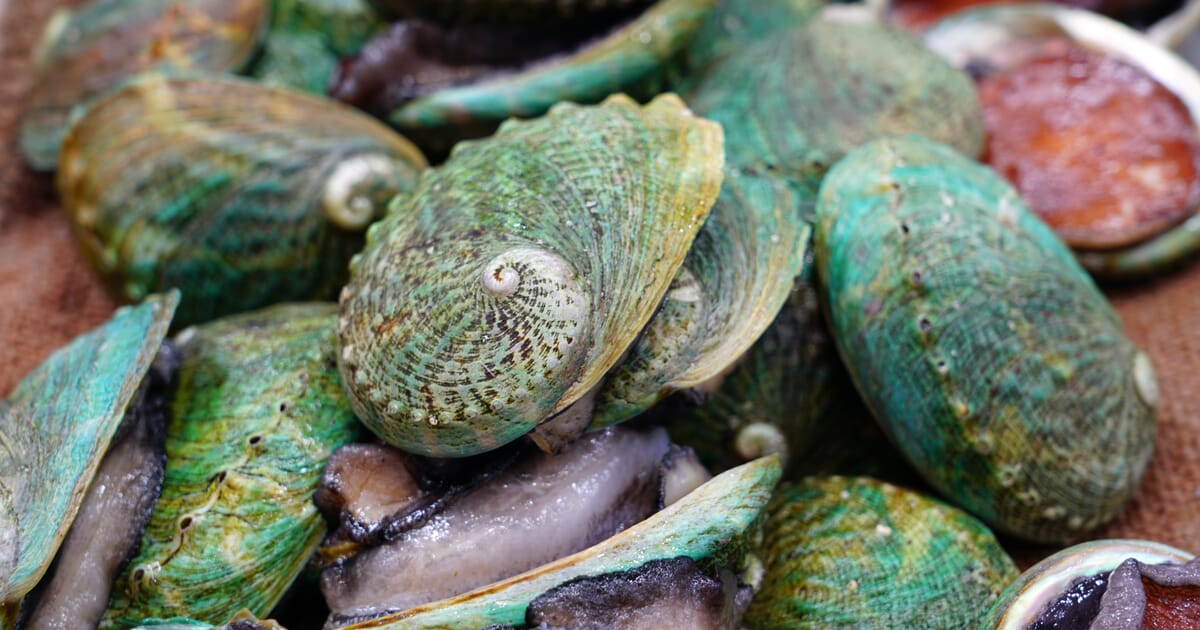

**Attributes/columns**

* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years

In [ ]:
# Import data
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
df = pd.read_csv(url, names=column_names)

In [ ]:
# Check the data
print("Number of samples:", len(df))
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


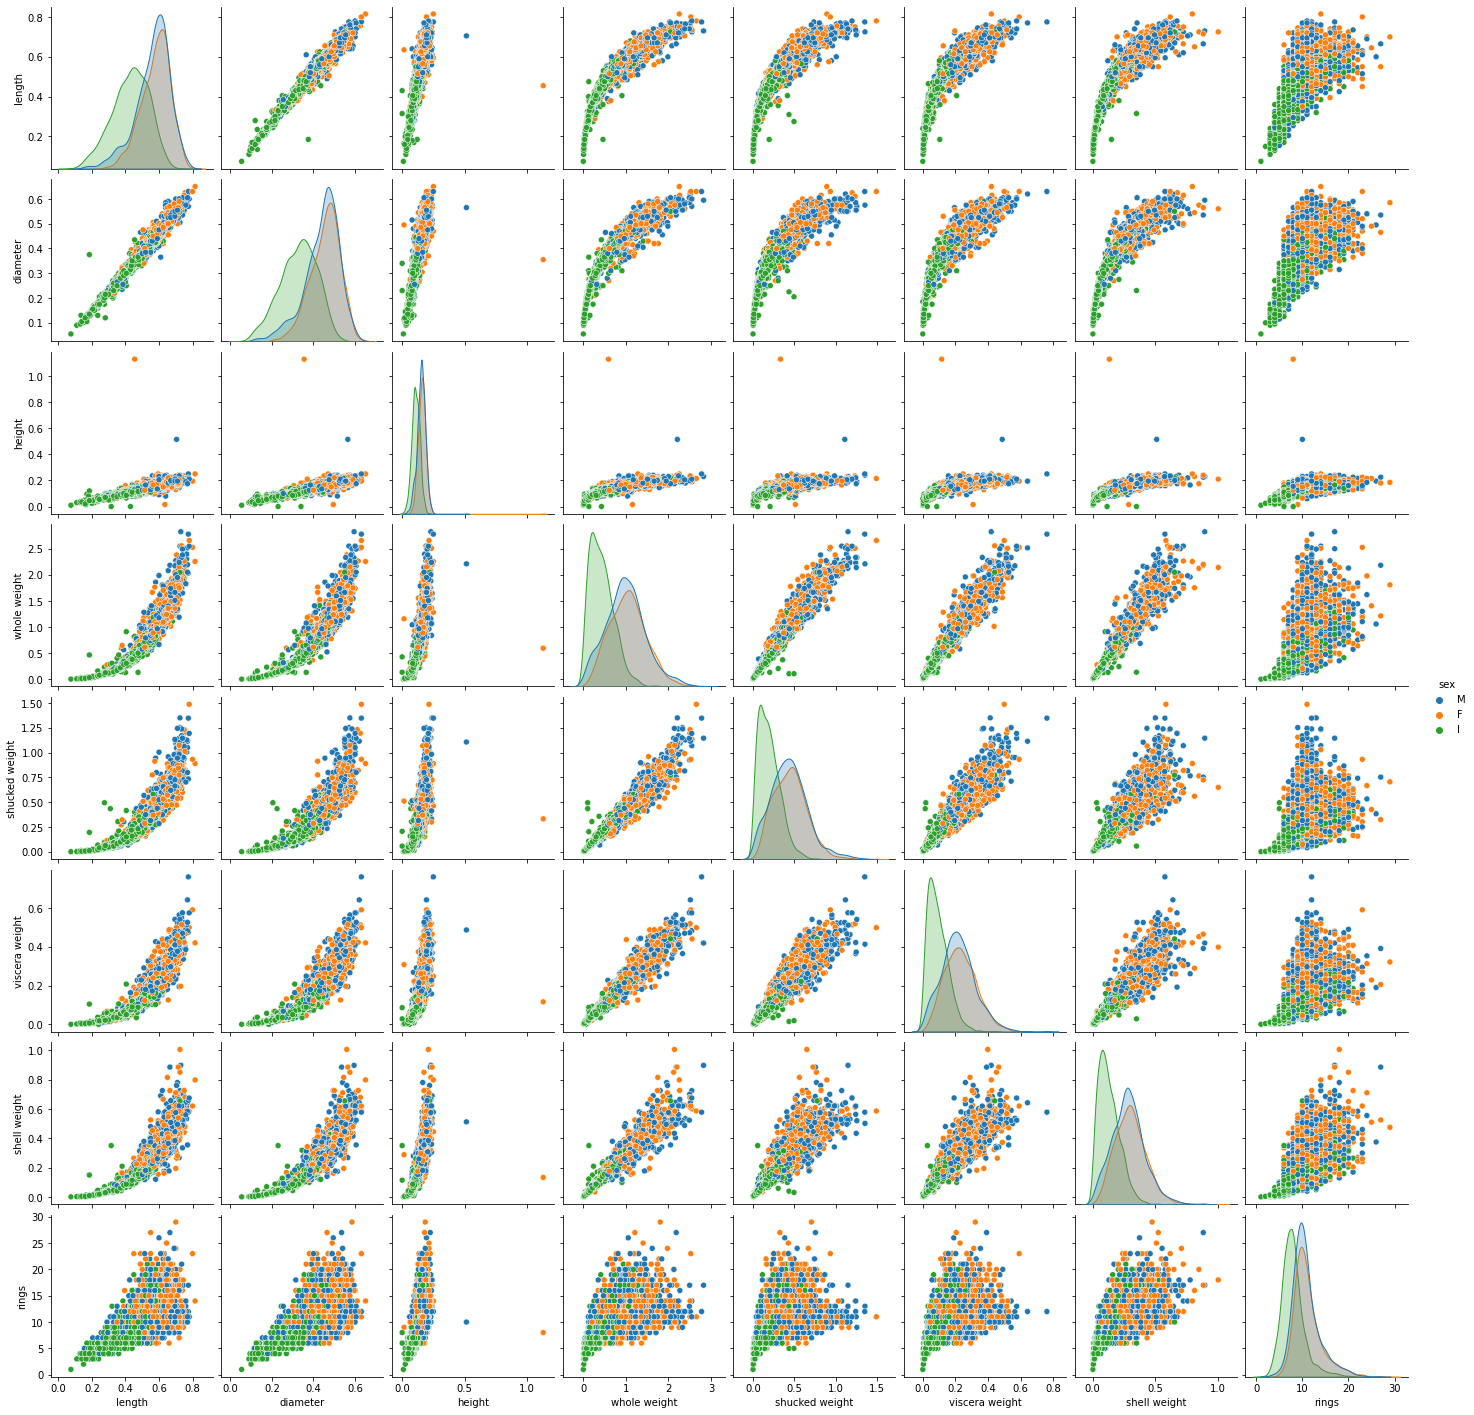

In [ ]:
# Inspect data visually
sns.pairplot(df, hue = 'sex')

# 2. Pre-process the data

Most of the attributes are numerical, which is what machine learning can deal with. If an attribute is categorical, we have to turn it numerical so that Keras can handle it. In this case it's the `sex` attribute that is categorical. To turn it numerical, we are going to turn it into three binary (0/1) features. Is the abalone female? Yes/No. Is the abalone male? Yes/No. Is the abalone an infant? Yes/No.

In [ ]:
# Binarize the categorical variable
df = pd.get_dummies(df, columns = ['sex'])
df.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In order for the network to deal with the data, we need to re-scale the data so that it has the same scale and range. We need this partly because our features are on different scales, some are centimeters and some are grams. It is also to make the network a better and faster learner. Since we are initializing the parameters randomly at small values, and their size depends on the feature size due to the multiplication, the learning process can get unstable, too dependent on just some variables instead of others or even fail unless we do this.

The procedure is a little different for each such re-scaling method. In this case we are going to use normalization which means we re-scale the data so that it ranges from 0 to 1.

In [ ]:
# Define the features
features = ["length", "diameter", "height", "whole weight", 
            "shucked weight", "viscera weight", "shell weight",
            "sex_F", "sex_I", "sex_M"]
target = "rings"

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X=df[features])
y = scaler.fit_transform(X=df[target].values.reshape(-1, 1))

In [ ]:
# Inspect the first feature before normalization
px.histogram(x=df[features[0]], title = "Distribution of the first feature")

In [ ]:
# Inspect the first feature after normalization
px.histogram(x=X[:, 0], title = "Distribution of the first feature after normalization")

# 3. Split data into train and test set

As a general rule in Machine Learning, we know that the algorithm might learn to replicate the data *too* well. This means that it will be super good at classifying data it has already seen, but really poor when new data comes in. This phenomena is called ***overfitting***. In order to avoid it, we always split the data in to at least two sets - one for training the algorithm, and one for testing (evaluating) the algorithm. 

In [ ]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# 4. Build our model in Keras 

Now we are ready to start building our network architecture! In Keras we use the Sequantial class to step by step add the layers that we want. We can then use the `summary` call to check out or model before training it with the `fit` method. 

Apart form the InputLayer, what we are going to use are Dense layers. This means that they are fully connected - meaning each node in a layer is connected to every node in the previous layer. It doesn't actually always have to be like this, which is something we will learn about further on in the camp. 

Each layer consists of a number of nodes, called units in Keras. So we specify the number of units to have in each layer that we add. In the XOR example, we only had two, but now I'm going to use more of them.

For each layer, we also choose an activation function, just like those we were practising before. 

In [ ]:
# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

model = Sequential()
model.add(InputLayer(name = 'input_layer', input_shape=(10,)))
model.add(Dense(units=10, activation='relu', name = 'hidden_layer'))
model.add(Dense(units=1, activation='linear', name = 'output_layer'))

In [ ]:
# Check the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Next up, we are going to `compile` the model. This means that we tell it how it should be trained. For example, we specify which loss function to use, how to optimize the parameters and what metrics to collect.

In this case, we will be using Mean Absolute Error as loss function, which is the same as we coded before. [Here](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) you can read more about different loss functions.

For optimizers, we will use Stochastic Gradient Descent like we learned before. With the help of the `learning_rate` argument, we specify the step size for the algorithm to take after calculation of the gradient. 

Finally, we will collect `mse` as metrics, just to get one more measure of the model performance. MSE stands for Mean Squared Error and it's similar to MAE but a little bit different. Read more about it [here](https://en.wikipedia.org/wiki/Mean_squared_error). 

In [ ]:
# Compile the model
from keras.losses import MeanAbsoluteError
from keras.optimizers import SGD

model.compile(
    loss=MeanAbsoluteError(),
    optimizer=SGD(learning_rate=0.01),
    metrics=["mse"],
)

Finally it is time to train the model! We do this with the help of the `fit` method. We give it the training data and the training target. 

We also specify `batch_size`, which is how many examples that will be processed/propagated through the network at the same time. We do not want to use them all at ones, since these computations are costly. In a sense, we fit the model little by little by not using all data at ones. If `batch_size` is 50, we will first use 50 examples, then another 50 more, until we've used all training data.

When training a deep learning model, we have to iterate over the data several times and adjust the parameters until we find a good fit. With `epochs`, we specify how many such iterations to do. 

Finally, in order to again try and avoid overfitting, we do not calculate the loss on the same data as we train it on. From the training data, we take some examples and save for evaluation only. We call this validation data, and so with `validation_split` we specify what portion to hold out like this in each iteration. 

In [ ]:
# Train model
history = model.fit(X_train, y_train, batch_size = 75, epochs = 15, validation_split = 0.25)

Epoch 1/15
32/32 [==============================] - 2s 6ms/step - loss: 0.1822 - mse: 0.0548 - val_loss: 0.1022 - val_mse: 0.0166
Epoch 2/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0924 - mse: 0.0143 - val_loss: 0.0832 - val_mse: 0.0117
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0774 - mse: 0.0112 - val_loss: 0.0738 - val_mse: 0.0101
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0703 - mse: 0.0100 - val_loss: 0.0690 - val_mse: 0.0093
Epoch 5/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0668 - mse: 0.0096 - val_loss: 0.0665 - val_mse: 0.0090
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0652 - mse: 0.0093 - val_loss: 0.0653 - val_mse: 0.0088
Epoch 7/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0642 - mse: 0.0092 - val_loss: 0.0644 - val_mse: 0.0083
Epoch 8/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0634 - mse: 0.00

# 4. Evaluate the model

In [ ]:
# Check history object
history.history

{'loss': [0.1822170466184616,
  0.0923854261636734,
  0.0773724764585495,
  0.07031713426113129,
  0.06683968752622604,
  0.06517330557107925,
  0.06419447809457779,
  0.06341301649808884,
  0.0627809688448906,
  0.06237192824482918,
  0.062059007585048676,
  0.06172848492860794,
  0.06121385097503662,
  0.06106287240982056,
  0.06079019233584404],
 'mse': [0.054798346012830734,
  0.014338787645101547,
  0.011198265478014946,
  0.010034364648163319,
  0.00956402812153101,
  0.009337716735899448,
  0.009220758453011513,
  0.009061490185558796,
  0.009009456261992455,
  0.008899190463125706,
  0.00882144644856453,
  0.00875113531947136,
  0.008559416979551315,
  0.00858110748231411,
  0.008490483276546001],
 'val_loss': [0.10215093940496445,
  0.08324623107910156,
  0.07384688407182693,
  0.06895305216312408,
  0.06652482599020004,
  0.06527777016162872,
  0.06444887816905975,
  0.06345544755458832,
  0.06292013078927994,
  0.06250138580799103,
  0.06177724525332451,
  0.0613049194216728

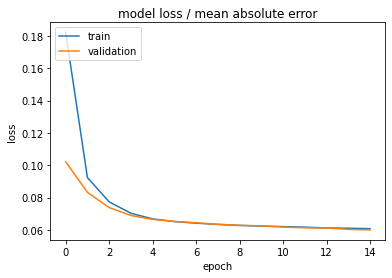

In [ ]:
# Plot the loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss / mean absolute error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

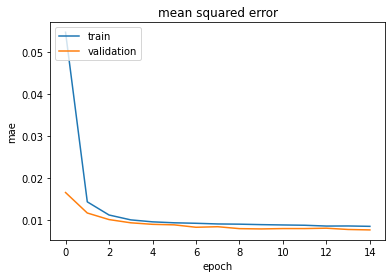

In [ ]:
# Plot mse
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Finally, evaluate on our test set
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Train loss:", history.history['loss'][-1])
print("Test loss:", test_scores[0])

33/33 - 0s - loss: 0.0584 - mse: 0.0072
Train loss: 0.06079019233584404
Test loss: 0.058382630348205566


In [ ]:
# Delete the model before trying new settings
del(model)